In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("donations.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           428 non-null    object 
 1   donation_amount  347 non-null    float64
 2   donation_type    436 non-null    object 
 3   date             410 non-null    object 
dtypes: float64(1), object(3)
memory usage: 15.8+ KB


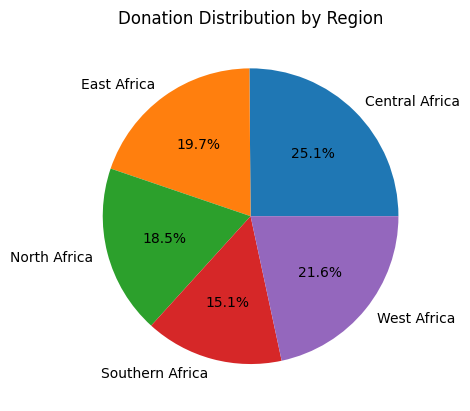

In [7]:
region_donations = df.groupby('region')['donation_amount'].sum()

plt.pie(region_donations, labels=region_donations.index, autopct='%1.1f%%')
plt.title("Donation Distribution by Region")
plt.show()

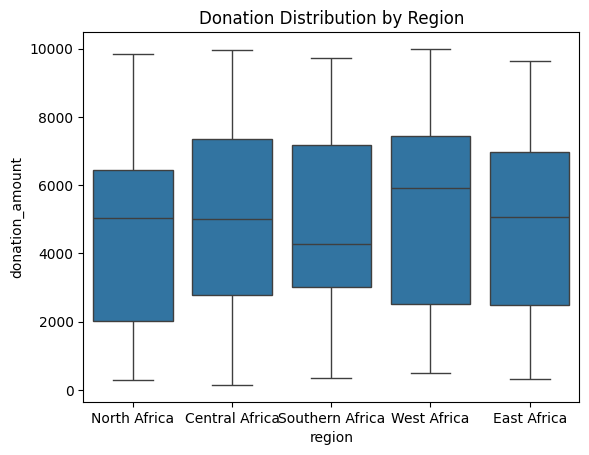

In [8]:
import seaborn as sns

# boxplot
sns.boxplot(data=df, x='region', y='donation_amount')
plt.title("Donation Distribution by Region")
plt.show()

In [9]:
# merge datasets and create heatmap
df1 = pd.read_csv("donations.csv")
df2 = pd.read_csv("hunger.csv")
df3 = pd.read_csv("food_wastage.csv")

merged_df = df1.merge(df2, on='region').merge(df3, on='region')

merged_df.head()

,region,donation_amount,donation_type,date,hunger_index,population,food_wastage
0,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,2513.0
1,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,3607.1
2,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,NaN
3,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,4987.1
4,North Africa,6324.54,food,2025-01-01,40.2,1309791.0,NaN


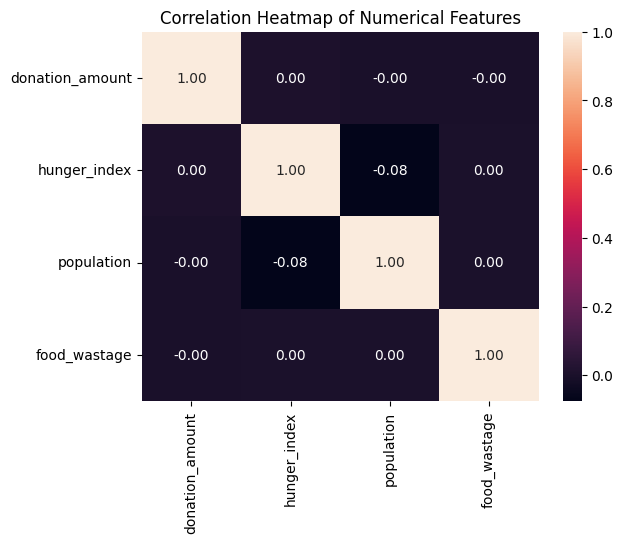

In [11]:
# compute correlation matrix
merged = merged_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = merged.corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()